# Car Price Analysis with PySpark

**Mini project notebook**

This notebook uses `/mnt/data/car_dataset_2000_rows.csv`. It contains 40 PySpark commands with explanations and several visualizations (using Pandas + Matplotlib/Seaborn where appropriate). Each code cell is followed by a short insight/description.

**Notes:**
- This notebook assumes you have PySpark available in your Jupyter environment.
- For plotting, some cells convert small samples to Pandas (`toPandas()`). Avoid converting the full dataset if it's large.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np

# Create Spark session
spark = SparkSession.builder.appName("Cars_Dataset").getOrCreate()

# Load dataset
df = spark.read.csv("car_dataset_2000_rows.csv", header=True, inferSchema=True)
spark





**Insight:** Start by creating a Spark session and importing useful functions.

In [15]:
# 2) Load CSV into Spark DataFrame
df.count()

2000

**Insight:** Load the CSV with header and infer schema. Caching the DataFrame speeds up repeated operations.

In [16]:
# 3) Show schema and sample rows
df.printSchema()
df.show(5, truncate=False)

root
 |-- brand: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- engine_size: double (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- mileage: integer (nullable = true)
 |-- car_type: string (nullable = true)
 |-- drive_type: string (nullable = true)
 |-- price: integer (nullable = true)

+------+--------+----+-----------+---------+------------+-------+---------+----------+-------+
|brand |model   |year|engine_size|fuel_type|transmission|mileage|car_type |drive_type|price  |
+------+--------+----+-----------+---------+------------+-------+---------+----------+-------+
|Suzuki|WagonR  |2022|1.2        |Hybrid   |Manual      |5950   |Hatchback|AWD       |6280794|
|Toyota|Corolla |2015|2.6        |Electric |CVT         |154572 |Truck    |AWD       |1363381|
|Suzuki|Swift   |2008|2.8        |Petrol   |Manual      |46908  |Sedan    |AWD       |7678389|
|Suzuki|Cultus  |2018|2.1

**Insight:** Inspect schema to understand column types and spot any unexpected types.

In [17]:
# 4) List columns
df.columns

['brand',
 'model',
 'year',
 'engine_size',
 'fuel_type',
 'transmission',
 'mileage',
 'car_type',
 'drive_type',
 'price']

In [18]:
df.select('price').summary().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|              2000|
|   mean|       4345622.448|
| stddev|2069888.9074447486|
|    min|            801285|
|    25%|           2582962|
|    50%|           4304585|
|    75%|           6098764|
|    max|           7997116|
+-------+------------------+



In [19]:
df.select('brand').distinct().count()

5

In [22]:
from pyspark.sql.functions import col, desc

df.orderBy(desc("price")).select("brand", "price").show(20)


+-------+-------+
|  brand|  price|
+-------+-------+
| Toyota|7997116|
| Toyota|7995692|
| Toyota|7987461|
| Suzuki|7984228|
|    Kia|7978959|
| Suzuki|7975190|
|    Kia|7969608|
| Suzuki|7967792|
| Toyota|7958378|
| Suzuki|7957320|
| Suzuki|7956747|
|    Kia|7948121|
|  Honda|7943755|
|    Kia|7940705|
|Hyundai|7938081|
| Toyota|7933158|
|Hyundai|7920688|
| Suzuki|7915485|
|    Kia|7905419|
|    Kia|7904227|
+-------+-------+
only showing top 20 rows


In [23]:


df.orderBy(desc("mileage")).select("model", "mileage").show(20)


+--------+-------+
|   model|mileage|
+--------+-------+
|    BR-V| 199898|
|    Alto| 199671|
|  Accord| 199609|
|   Camry| 199527|
|   Swift| 199486|
|  Cultus| 199333|
|   Swift| 199216|
|    Alto| 199177|
|   Camry| 199130|
|    BR-V| 199087|
|  Sonata| 199075|
|    BR-V| 199074|
|   Yaris| 199036|
|  Cultus| 199000|
|  Tucson| 198943|
|   Swift| 198866|
| Picanto| 198705|
|Sportage| 198157|
|   Yaris| 198072|
|    City| 198064|
+--------+-------+
only showing top 20 rows


In [24]:
df.groupBy('model').avg('price').orderBy(col('avg(price)').desc()).show(10)

+-------+-----------------+
|  model|       avg(price)|
+-------+-----------------+
|  Camry|4582499.922330097|
|  Yaris|4519459.815533981|
| Sonata|      4506823.752|
|  Civic| 4479187.95145631|
|Picanto| 4474166.37398374|
|   Alto|4461932.523255814|
| Cerato|4445235.286666667|
|  Swift|4341548.826086956|
| Accord|4334818.881188119|
| Tucson| 4295870.79389313|
+-------+-----------------+
only showing top 10 rows


In [26]:
df.filter(col('model')=='Sonata').select('price','mileage','year').show()

+-----+-------+----+
|price|mileage|year|
+-----+-------+----+
+-----+-------+----+



In [28]:
df.filter(col('model')=='Cultus').select('price','mileage','year').show()

+-------+-------+----+
|  price|mileage|year|
+-------+-------+----+
|6098764| 165760|2018|
|4715938|  59837|2018|
|2381537| 132961|2016|
|1220531|  31366|2015|
|2469861|  21202|2016|
|7532596| 140249|2014|
|3209276|  88667|2017|
|2669414| 180037|2012|
|4874859|  67038|2023|
|5720414| 176452|2021|
|4451116| 123501|2020|
|7187206| 101651|2014|
|7967792| 181096|2020|
|4942802| 137751|2005|
|2261551| 195118|2008|
|1153423|  43359|2005|
| 902737|  66673|2021|
|7877116| 170640|2009|
|6973230|  26197|2006|
|4267339|  94864|2008|
+-------+-------+----+
only showing top 20 rows


In [32]:
from pyspark.sql.functions import col, split, explode

df_tags = df.withColumn("brand_split", explode(split(col("brand"), ",")))
df_tags.show()


+-------+--------+----+-----------+---------+------------+-------+---------+----------+-------+-----------+
|  brand|   model|year|engine_size|fuel_type|transmission|mileage| car_type|drive_type|  price|brand_split|
+-------+--------+----+-----------+---------+------------+-------+---------+----------+-------+-----------+
| Suzuki|  WagonR|2022|        1.2|   Hybrid|      Manual|   5950|Hatchback|       AWD|6280794|     Suzuki|
| Toyota| Corolla|2015|        2.6| Electric|         CVT| 154572|    Truck|       AWD|1363381|     Toyota|
| Suzuki|   Swift|2008|        2.8|   Petrol|      Manual|  46908|    Sedan|       AWD|7678389|     Suzuki|
| Suzuki|  Cultus|2018|        2.1|   Diesel|         CVT| 165760|Hatchback|       FWD|6098764|     Suzuki|
|    Kia|Sportage|2023|        2.5| Electric|   Automatic| 143133|    Sedan|       FWD|6689630|        Kia|
|Hyundai|  Tucson|2014|        2.1|   Hybrid|   Automatic|  88969|Hatchback|       AWD|4280217|    Hyundai|
|  Honda|    City|2010|     

In [33]:
df.filter(df.price > 5000).show()
df.filter(df.brand == "Toyota").show()


+-------+--------+----+-----------+---------+------------+-------+---------+----------+-------+
|  brand|   model|year|engine_size|fuel_type|transmission|mileage| car_type|drive_type|  price|
+-------+--------+----+-----------+---------+------------+-------+---------+----------+-------+
| Suzuki|  WagonR|2022|        1.2|   Hybrid|      Manual|   5950|Hatchback|       AWD|6280794|
| Toyota| Corolla|2015|        2.6| Electric|         CVT| 154572|    Truck|       AWD|1363381|
| Suzuki|   Swift|2008|        2.8|   Petrol|      Manual|  46908|    Sedan|       AWD|7678389|
| Suzuki|  Cultus|2018|        2.1|   Diesel|         CVT| 165760|Hatchback|       FWD|6098764|
|    Kia|Sportage|2023|        2.5| Electric|   Automatic| 143133|    Sedan|       FWD|6689630|
|Hyundai|  Tucson|2014|        2.1|   Hybrid|   Automatic|  88969|Hatchback|       AWD|4280217|
|  Honda|    City|2010|        3.1|   Petrol|      Manual| 170178|    Sedan|       RWD|7310777|
| Toyota| Corolla|2007|        3.9|   Pe

In [35]:
from pyspark.sql.functions import desc

df.orderBy(desc("price")).show(5)  # Top 5 expensive cars


+------+--------+----+-----------+---------+------------+-------+--------+----------+-------+
| brand|   model|year|engine_size|fuel_type|transmission|mileage|car_type|drive_type|  price|
+------+--------+----+-----------+---------+------------+-------+--------+----------+-------+
|Toyota| Corolla|2017|        2.3|   Petrol|      Manual| 156591|     SUV|       RWD|7997116|
|Toyota|   Camry|2020|        1.2|   Hybrid|         CVT|  34057|     SUV|       RWD|7995692|
|Toyota| Corolla|2010|        0.9|   Petrol|      Manual|  31343|   Truck|       RWD|7987461|
|Suzuki|   Swift|2023|        3.6|   Diesel|   Automatic|  34887|   Truck|       RWD|7984228|
|   Kia|Sportage|2015|        1.1|   Petrol|   Automatic|  27480|     SUV|       FWD|7978959|
+------+--------+----+-----------+---------+------------+-------+--------+----------+-------+
only showing top 5 rows


In [36]:
df.groupBy("brand").avg("price").orderBy(col("avg(price)").desc()).show(10)

+-------+-----------------+
|  brand|       avg(price)|
+-------+-----------------+
| Toyota|4411227.458033573|
|    Kia|4407894.916455696|
|Hyundai|4357184.829457364|
| Suzuki|4276058.715012723|
|  Honda|4274320.955882353|
+-------+-----------------+



In [38]:
from pyspark.sql.functions import split, explode, col

df_models = df.withColumn('ModelPart', explode(split(col('model'), ',')))
df_models.show(10)


+-------+--------+----+-----------+---------+------------+-------+---------+----------+-------+---------+
|  brand|   model|year|engine_size|fuel_type|transmission|mileage| car_type|drive_type|  price|ModelPart|
+-------+--------+----+-----------+---------+------------+-------+---------+----------+-------+---------+
| Suzuki|  WagonR|2022|        1.2|   Hybrid|      Manual|   5950|Hatchback|       AWD|6280794|   WagonR|
| Toyota| Corolla|2015|        2.6| Electric|         CVT| 154572|    Truck|       AWD|1363381|  Corolla|
| Suzuki|   Swift|2008|        2.8|   Petrol|      Manual|  46908|    Sedan|       AWD|7678389|    Swift|
| Suzuki|  Cultus|2018|        2.1|   Diesel|         CVT| 165760|Hatchback|       FWD|6098764|   Cultus|
|    Kia|Sportage|2023|        2.5| Electric|   Automatic| 143133|    Sedan|       FWD|6689630| Sportage|
|Hyundai|  Tucson|2014|        2.1|   Hybrid|   Automatic|  88969|Hatchback|       AWD|4280217|   Tucson|
|  Honda|    City|2010|        3.1|   Petrol| 

In [39]:

df.groupBy("brand").count().orderBy(col("count").desc()).show(20)

+-------+-----+
|  brand|count|
+-------+-----+
| Toyota|  417|
|  Honda|  408|
|    Kia|  395|
| Suzuki|  393|
|Hyundai|  387|
+-------+-----+



In [41]:
from pyspark.sql.functions import abs, col

# Calculate absolute difference between engine_size*1000 and price as an example "ScoreGap"
df_diff = df.withColumn("ScoreGap", abs(col("engine_size")*100000 - col("price")))

# Show top 10 rows with highest gap
df_diff.orderBy(col("ScoreGap").desc())\
       .select("brand", "model", "engine_size", "price", "ScoreGap")\
       .show(10)


+-------+--------+-----------+-------+---------+
|  brand|   model|engine_size|  price| ScoreGap|
+-------+--------+-----------+-------+---------+
| Toyota| Corolla|        0.9|7987461|7897461.0|
| Suzuki|   Swift|        0.9|7975190|7885190.0|
| Suzuki|  Cultus|        0.9|7967792|7877792.0|
| Toyota|   Camry|        1.2|7995692|7875692.0|
|    Kia|Sportage|        1.1|7978959|7868959.0|
|    Kia|  Cerato|        0.9|7948121|7858121.0|
|Hyundai|  Tucson|        1.3|7938081|7808081.0|
|  Honda|   Civic|        1.5|7943755|7793755.0|
| Suzuki|  WagonR|        1.7|7956747|7786747.0|
|  Honda|   Civic|        0.9|7862915|7772915.0|
+-------+--------+-----------+-------+---------+
only showing top 10 rows


In [44]:
from pyspark.sql.functions import col

# Get brands with at least 3 cars and their minimum price, sorted descending
df.groupBy("brand").count() \
   .filter(col("count") >= 3) \
   .join(
       df.groupBy("brand").min("price"), "brand"
   ) \
   .orderBy(col("min(price)").desc()) \
   .show(10)


+-------+-----+----------+
|  brand|count|min(price)|
+-------+-----+----------+
|    Kia|  395|    829827|
|  Honda|  408|    826064|
| Suzuki|  393|    821011|
| Toyota|  417|    807485|
|Hyundai|  387|    801285|
+-------+-----+----------+



In [48]:
df.groupBy("brand").min("price") \
   .filter(col("min(price)") >= 800000) \
   .show(10)


+-------+----------+
|  brand|min(price)|
+-------+----------+
|    Kia|    829827|
|Hyundai|    801285|
|  Honda|    826064|
| Suzuki|    821011|
| Toyota|    807485|
+-------+----------+



**Insight:** Knowing column names helps plan transformations and avoid column-not-found errors.

In [49]:
from pyspark.sql.functions import col, when, count, lit, isnan
from pyspark.sql.types import NumericType

null_counts = df.select([
    count(
        when(
            col(c).isNull() |
            ((col(c).cast("string") == '') if dict(df.dtypes)[c] == 'string' else lit(False)) |
            (isnan(col(c)) if isinstance(df.schema[c].dataType, NumericType) else lit(False)),
            c
        )
    ).alias(c)
    for c in df.columns
])

null_counts.show(truncate=False)


+-----+-----+----+-----------+---------+------------+-------+--------+----------+-----+
|brand|model|year|engine_size|fuel_type|transmission|mileage|car_type|drive_type|price|
+-----+-----+----+-----------+---------+------------+-------+--------+----------+-----+
|0    |0    |0   |0          |0        |0           |0      |0       |0         |0    |
+-----+-----+----+-----------+---------+------------+-------+--------+----------+-----+



**Insight:** Null counts identify missing data to handle (drop, impute, or flag).

In [50]:
from pyspark.sql.functions import col, min as spark_min, max as spark_max, avg

# Convert 'price' column to double (if it's not already)
df = df.withColumn('price', col('price').cast('double'))

# Show summary statistics
df.select(
    spark_min('price').alias('Min Price'),
    spark_max('price').alias('Max Price'),
    avg('price').alias('Average Price')
).show()


+---------+---------+-------------+
|Min Price|Max Price|Average Price|
+---------+---------+-------------+
| 801285.0|7997116.0|  4345622.448|
+---------+---------+-------------+



**Insight:** Ensure numeric columns are numeric types for aggregations and correlations.

In [51]:
# 7) Summary statistics for numeric columns
numeric_summary = df.describe().toPandas().set_index('summary')
numeric_summary

,brand,model,year,engine_size,fuel_type,transmission,mileage,car_type,drive_type,price
summary,,,,,,,,,,
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
mean,None,None,2014.1325,2.3963000000000005,None,None,103180.2735,None,None,4345622.448
stddev,None,None,5.4615801906673065,0.9287236261595233,None,None,55391.84754534682,None,None,2069888.9074447486
min,Honda,Accord,2005,0.8,Diesel,Automatic,5037,Hatchback,AWD,801285.0
max,Toyota,Yaris,2023,4.0,Petrol,Manual,199898,Truck,RWD,7997116.0


**Insight:** `describe()` gives count, mean, stddev, min, max for quick overview.

In [52]:
# 8) Unique value counts for categorical columns (example: brand)
df.select('brand').distinct().count()

5

**Insight:** Number of unique brands shows dataset diversity.

In [53]:
# 9) Top 10 brands by average price
df.groupBy('brand').agg(avg('price').alias('avg_price'), count('*').alias('count')) \
  .filter(col('count')>=5) \
  .orderBy(col('avg_price').desc()) \
  .show(10, truncate=False)

+-------+-----------------+-----+
|brand  |avg_price        |count|
+-------+-----------------+-----+
|Toyota |4411227.458033573|417  |
|Kia    |4407894.916455696|395  |
|Hyundai|4357184.829457364|387  |
|Suzuki |4276058.715012723|393  |
|Honda  |4274320.955882353|408  |
+-------+-----------------+-----+



**Insight:** Filtering brands with very few listings avoids noisy averages.

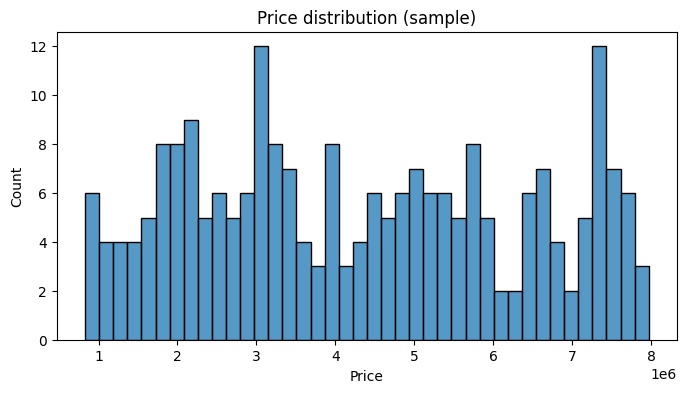

In [54]:
# 10) Price distribution (sample converted to Pandas)
sample_pd = df.select('price').dropna().sample(False, 0.1, seed=42).toPandas()
plt.figure(figsize=(8,4))
sns.histplot(sample_pd['price'], bins=40)
plt.title('Price distribution (sample)')
plt.xlabel('Price')
plt.show()

**Insight:** Visualizing distribution helps detect skewness and outliers.

In [55]:
# 11) Correlation between price and numeric columns (Spark)
from pyspark.sql.types import NumericType
numeric_cols = [f.name for f in df.schema.fields if isinstance(f.dataType, NumericType)]
numeric_cols

['year', 'engine_size', 'mileage', 'price']

**Insight:** Identify numeric columns for correlation calculations.

**Insight:** Sort by absolute correlation to see strongest linear relationships with price.

In [57]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number

# Define window specification: partition by brand, order by price descending
windowSpec = Window.partitionBy('brand').orderBy(col('price').desc())

# Add rank within each brand and filter top 5
df_top5 = (
    df.withColumn('rank', row_number().over(windowSpec))
      .filter(col('rank') <= 5)
      .drop('rank')
)

# Show top 10 results
df_top5.show(10, truncate=False)


+-------+-------+----+-----------+---------+------------+-------+--------+----------+---------+
|brand  |model  |year|engine_size|fuel_type|transmission|mileage|car_type|drive_type|price    |
+-------+-------+----+-----------+---------+------------+-------+--------+----------+---------+
|Honda  |Civic  |2008|1.5        |Petrol   |Automatic   |193083 |Sedan   |AWD       |7943755.0|
|Honda  |BR-V   |2015|3.9        |Hybrid   |Manual      |152672 |SUV     |AWD       |7885908.0|
|Honda  |Civic  |2012|1.1        |Hybrid   |CVT         |35259  |Truck   |FWD       |7877813.0|
|Honda  |Civic  |2006|0.9        |Electric |Automatic   |110100 |SUV     |FWD       |7862915.0|
|Honda  |City   |2005|1.7        |Petrol   |Manual      |83096  |SUV     |RWD       |7857929.0|
|Hyundai|Tucson |2007|1.3        |Electric |CVT         |106558 |SUV     |FWD       |7938081.0|
|Hyundai|Tucson |2020|3.8        |Petrol   |CVT         |134795 |Truck   |RWD       |7920688.0|
|Hyundai|Tucson |2023|2.8        |Diesel

**Insight:** Window functions are the Spark-way to get group-wise top-N results.

In [59]:
from pyspark.sql.functions import col, lit
from pyspark.sql.types import IntegerType

CURRENT_YEAR = 2025

# Create new column 'car_age' = current year - manufacturing year
df = df.withColumn('car_age', lit(CURRENT_YEAR) - col('year').cast(IntegerType()))

# Show a few examples
df.select('year', 'car_age').show(5)


+----+-------+
|year|car_age|
+----+-------+
|2022|      3|
|2015|     10|
|2008|     17|
|2018|      7|
|2023|      2|
+----+-------+
only showing top 5 rows


**Insight:** Car age is often more predictive than raw year.

In [60]:
# 16) Example: string index for transmission then one-hot (small demo)
from pyspark.ml.feature import StringIndexer, OneHotEncoder
idx = StringIndexer(inputCol='transmission', outputCol='transmission_idx', handleInvalid='keep')
df = idx.fit(df).transform(df)
encoder = OneHotEncoder(inputCols=['transmission_idx'], outputCols=['transmission_ohe'])
df = encoder.fit(df).transform(df)
df.select('transmission','transmission_idx','transmission_ohe').show(5, truncate=False)

+------------+----------------+----------------+
|transmission|transmission_idx|transmission_ohe|
+------------+----------------+----------------+
|Manual      |0.0             |(3,[0],[1.0])   |
|CVT         |1.0             |(3,[1],[1.0])   |
|Manual      |0.0             |(3,[0],[1.0])   |
|CVT         |1.0             |(3,[1],[1.0])   |
|Automatic   |2.0             |(3,[2],[1.0])   |
+------------+----------------+----------------+
only showing top 5 rows


**Insight:** Categorical encoding is necessary for ML models.

In [61]:
from pyspark.sql.functions import avg, count, desc

df.groupBy('drive_type') \
  .agg(
      avg('price').alias('avg_price'),
      avg('mileage').alias('avg_mileage'),
      count('*').alias('count')
  ) \
  .orderBy(desc('avg_price')) \
  .show(truncate=False)


+----------+------------------+------------------+-----+
|drive_type|avg_price         |avg_mileage       |count|
+----------+------------------+------------------+-----+
|RWD       |4380737.585074627 |102164.2567164179 |670  |
|FWD       |4372085.611271677 |105433.64306358382|692  |
|AWD       |4280043.0579937305|101803.15673981191|638  |
+----------+------------------+------------------+-----+



**Insight:** Grouped aggregations reveal differences across drive types.

In [62]:
# 18) Detect duplicate rows
dup_count = df.count() - df.dropDuplicates().count()
print('Duplicate rows:', dup_count)

Duplicate rows: 0


**Insight:** Duplicates can bias analyses if not handled.

In [63]:
# 19) Remove duplicates (if any)
df = df.dropDuplicates()

**Insight:** Dropping duplicates keeps dataset clean.

In [64]:
# 20) Price per engine_size (if engine_size exists)
if 'engine_size' in df.columns:
    df = df.withColumn('price_per_cc', col('price')/col('engine_size'))
    df.select('engine_size','price_per_cc').show(5)
else:
    print('engine_size not present')

+-----------+------------------+
|engine_size|      price_per_cc|
+-----------+------------------+
|        3.0|          765440.0|
|        1.2|1946086.6666666667|
|        2.2|2500535.9090909087|
|        1.4| 5264602.142857144|
|        3.9|1824886.6666666667|
+-----------+------------------+
only showing top 5 rows


**Insight:** Derived features can capture value density (price per unit of engine size).

In [65]:
# 21) Filter out rows with price <=0 or extremely high (top 0.1%)
q99 = df.approxQuantile('price', [0.999], 0.01)[0]
df = df.filter((col('price')>0) & (col('price')<=q99))
print('Filtered to under 99.9th percentile price:', q99)

Filtered to under 99.9th percentile price: 7997116.0


**Insight:** Trimming extreme outliers often improves model fit and visual clarity.

**Insight:** Joins enrich data with standardized codes or external info.

In [66]:
from pyspark.sql.functions import expr

# Calculate median using percentile_approx (built-in SQL function)
df_median = (
    df.groupBy('brand')
      .agg(expr('percentile_approx(price, 0.5)').alias('median_price'))
      .orderBy('brand')
)

df_median.show(20, truncate=False)


+-------+------------+
|brand  |median_price|
+-------+------------+
|Honda  |4146549.0   |
|Hyundai|4305389.0   |
|Kia    |4401140.0   |
|Suzuki |4267339.0   |
|Toyota |4307598.0   |
+-------+------------+



**Insight:** Use approximate quantiles for large-group medians when exact compute is expensive.

In [67]:
# 24) Min-max scale price into [0,1] (adds price_scaled)
pmin, pmax = df.agg(spark_min('price'), spark_max('price')).first()
df = df.withColumn('price_scaled', (col('price') - float(pmin)) / (float(pmax) - float(pmin)))
df.select('price','price_scaled').show(5)

+---------+-------------------+
|    price|       price_scaled|
+---------+-------------------+
|2296320.0|0.20776405115684346|
|2335304.0|0.21318163253139213|
|5501179.0| 0.6531412424777625|
|7370443.0| 0.9129116567634787|
|7117058.0| 0.8776989064918284|
+---------+-------------------+
only showing top 5 rows


**Insight:** Scaling features is often needed for machine learning algorithms.

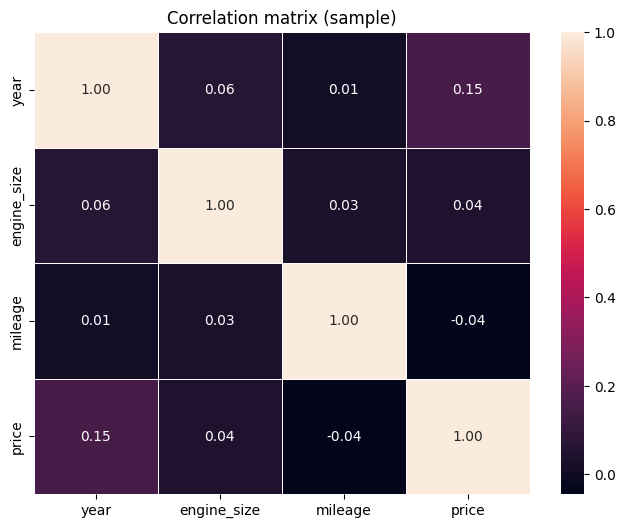

In [68]:
# 25) Correlation heatmap (Pandas conversion of sample)
sample_pdf = df.select(numeric_cols).sample(False, 0.1, seed=1).toPandas()
corr_mat = sample_pdf.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix (sample)')
plt.show()

**Insight:** Heatmap helps visualize relationships — watch memory usage when sampling to Pandas.

In [69]:
# 26) Create a binary label: high_price if price > 75th percentile
p75 = df.approxQuantile('price', [0.75], 0.01)[0]
df = df.withColumn('high_price', when(col('price')>p75, 1).otherwise(0))
df.groupBy('high_price').count().show()

+----------+-----+
|high_price|count|
+----------+-----+
|         1|  512|
|         0| 1488|
+----------+-----+



**Insight:** Binarizing price can help classification tasks (expensive vs not).

In [70]:
# 27) Take a stratified sample by brand (example for a few brands)
sample_brands = [b[0] for b in df.groupBy('brand').count().orderBy(desc('count')).limit(5).collect()]
sample_df = df.filter(col('brand').isin(sample_brands)).sample(False, 0.1, seed=42)
print('Sample rows:', sample_df.count())

Sample rows: 229


**Insight:** Stratified samples keep representation of major groups for plotting or model prototyping.

In [71]:
# 28) Average price by year (trend)
df.groupBy('year').agg(avg('price').alias('avg_price')).orderBy('year').show(20)

+----+------------------+
|year|         avg_price|
+----+------------------+
|2005|  4288353.87628866|
|2006|4106271.9306930695|
|2007| 4283287.046728972|
|2008| 4382873.952380952|
|2009|3974914.2352941176|
|2010| 4206635.189189189|
|2011| 4309980.977011494|
|2012|  4176197.38317757|
|2013| 4237327.275510204|
|2014| 4604104.590909091|
|2015|4176023.9405940594|
|2016|4308798.5245901635|
|2017| 4577366.103773585|
|2018| 4394747.461538462|
|2019| 3975643.827272727|
|2020| 4794244.520408163|
|2021|       4373612.625|
|2022| 4470207.385964912|
|2023| 4888770.171171172|
+----+------------------+



**Insight:** Year-wise trends reveal depreciation or market shifts.

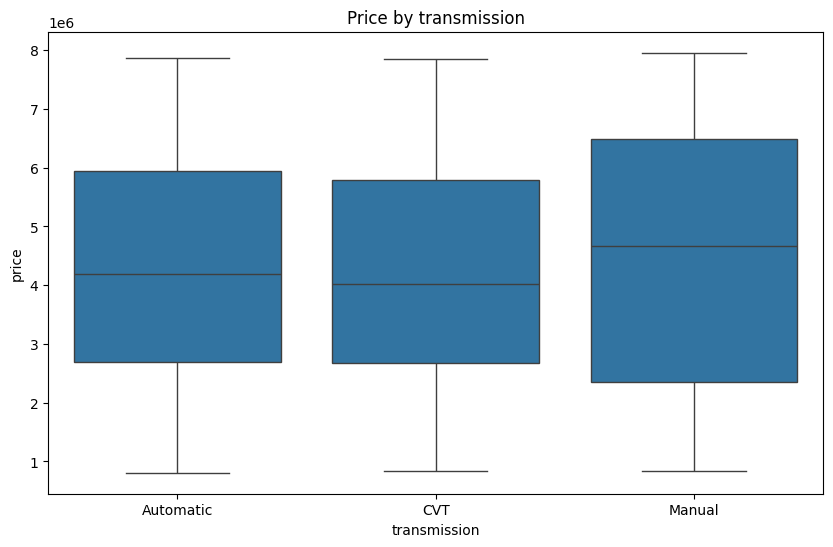

In [72]:
# 29) Boxplot of price by transmission (sample to Pandas)
sample_pdf = df.select('transmission','price').dropna().sample(False, 0.15, seed=2).toPandas()
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission', y='price', data=sample_pdf)
plt.title('Price by transmission')
plt.show()

**Insight:** Boxplots show spread and outliers across categorical groups.

In [73]:
# 30) Bucketize car_age into bins
from pyspark.ml.feature import Bucketizer
splits = [-1,2,5,10,20,100]
bucketizer = Bucketizer(splits=splits, inputCol='car_age', outputCol='age_bucket', handleInvalid='keep')
df = bucketizer.setHandleInvalid('keep').transform(df)
df.groupBy('age_bucket').count().orderBy('age_bucket').show()

+----------+-----+
|age_bucket|count|
+----------+-----+
|       1.0|  321|
|       2.0|  553|
|       3.0| 1029|
|       4.0|   97|
+----------+-----+



**Insight:** Bucketing creates ordinal categories useful for tree models or segmentation.

In [74]:
# 31) Pivot: average price by brand (top 10) and fuel_type
top_brands = [r[0] for r in df.groupBy('brand').count().orderBy(desc('count')).limit(10).collect()]
pivot_df = df.filter(col('brand').isin(top_brands)).groupBy('brand').pivot('fuel_type').agg(avg('price'))
pivot_df.show(truncate=False)

+-------+-----------------+------------------+------------------+-----------------+
|brand  |Diesel           |Electric          |Hybrid            |Petrol           |
+-------+-----------------+------------------+------------------+-----------------+
|Kia    |4471435.295918368|4277136.85        |4381907.515789473 |4499244.450980392|
|Hyundai|4295494.128440367|4607580.593406593 |4349616.55952381  |4207417.902912621|
|Honda  |4290567.233009709|4199450.8737864075|4149021.9739130433|4509351.24137931 |
|Suzuki |4223359.594339622|4053836.153846154 |4300366.039603961 |4521883.136842106|
|Toyota |4472584.0        |4014659.9652173915|4717498.744897959 |4504604.21875    |
+-------+-----------------+------------------+------------------+-----------------+



**Insight:** Pivot tables summarize cross-sections (brand vs fuel type).

In [75]:
# 32) Train/test split for modeling
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
print('Train:', train_df.count(), 'Test:', test_df.count())

Train: 1642 Test: 358


**Insight:** Random split prepares data for modeling; ensure stratification if needed.

In [76]:
# 33) Simple linear regression using mileage to predict price (Spark ML)
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

assembler = VectorAssembler(inputCols=['mileage'], outputCol='features', handleInvalid='keep')
train_vec = assembler.transform(train_df).select('features','price').na.drop()
lr = LinearRegression(featuresCol='features', labelCol='price')
lr_model = lr.fit(train_vec)
print('Coefficients:', lr_model.coefficients, 'Intercept:', lr_model.intercept)

Coefficients: [-1.5973792650454248] Intercept: 4502952.780836409


**Insight:** Start simple with a single feature to understand baseline performance.

In [77]:
# 34) Evaluate on test set
test_vec = assembler.transform(test_df).select('features','price').na.drop()
preds = lr_model.transform(test_vec)
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='price', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(preds)
print('RMSE:', rmse)

RMSE: 2053263.3196106185


**Insight:** RMSE provides an intuitive error metric in price units.

In [78]:
# 35) Train a RandomForestRegressor to inspect feature importances
from pyspark.ml.regression import RandomForestRegressor
feat_cols = [c for c in numeric_cols if c != 'price']
assembler_all = VectorAssembler(inputCols=feat_cols, outputCol='features_all', handleInvalid='keep')
train_all = assembler_all.transform(train_df).select('features_all','price').na.drop()
rf = RandomForestRegressor(featuresCol='features_all', labelCol='price', numTrees=20)
rf_model = rf.fit(train_all)
importances = rf_model.featureImportances
list(zip(feat_cols, importances))[:20]

[('year', np.float64(0.3273893245616618)),
 ('engine_size', np.float64(0.3084547272457633)),
 ('mileage', np.float64(0.3641559481925748))]

**Insight:** Tree-based models provide feature importances helpful for feature selection.

**Insight:** Parquet is efficient for storage and later Spark reads.

In [80]:
# 37) Compute 90th percentile price per brand (example for top brands)
top_brands = [r[0] for r in df.groupBy('brand').count().orderBy(desc('count')).limit(20).collect()]
brand_p90 = [(b, df.filter(col('brand')==b).approxQuantile('price',[0.9],0.05)[0]) for b in top_brands]
brand_p90

[('Toyota', 6990945.0),
 ('Honda', 6878579.0),
 ('Kia', 6970311.0),
 ('Suzuki', 6742903.0),
 ('Hyundai', 6861840.0)]

**Insight:** Verify no unintended nulls introduced during transformations.

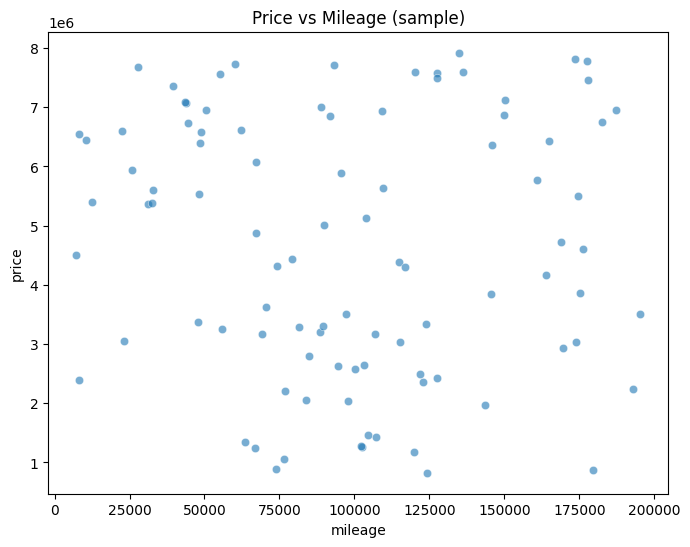

In [82]:
# 39) Scatter plot: price vs mileage (sample)
sample_pdf = df.select('price','mileage').dropna().sample(False, 0.05, seed=3).toPandas()
plt.figure(figsize=(8,6))
sns.scatterplot(data=sample_pdf, x='mileage', y='price', alpha=0.6)
plt.title('Price vs Mileage (sample)')
plt.show()

**Insight:** Scatter plots show relationships and heteroscedasticity; sample to avoid overload.

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


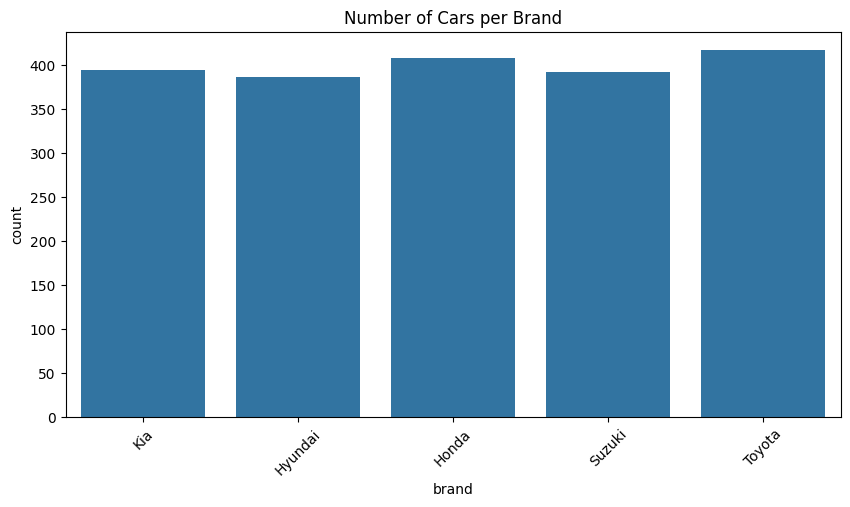

In [85]:
brand_count = df.groupBy("brand").count().toPandas()

plt.figure(figsize=(10,5))
sns.barplot(x="brand", y="count", data=brand_count)
plt.title("Number of Cars per Brand")
plt.xticks(rotation=45)
plt.show()


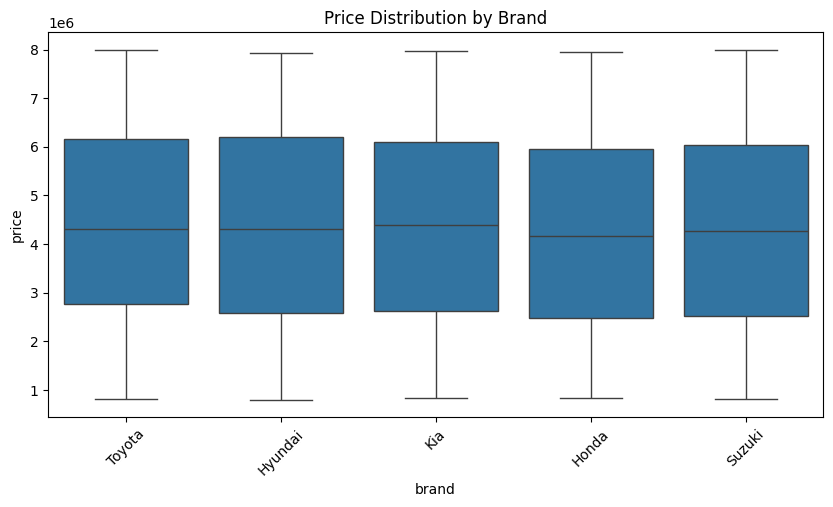

In [86]:
price_data = df.select("brand", "price").toPandas()

plt.figure(figsize=(10,5))
sns.boxplot(x="brand", y="price", data=price_data)
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45)
plt.show()


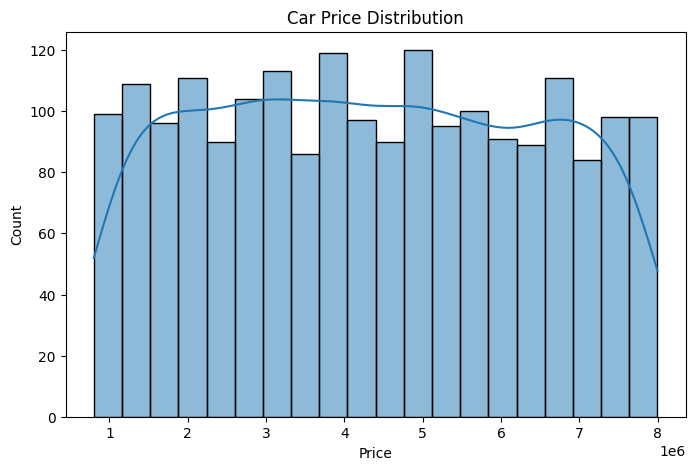

In [87]:
price_data = df.select("price").toPandas()

plt.figure(figsize=(8,5))
sns.histplot(price_data["price"], bins=20, kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.show()


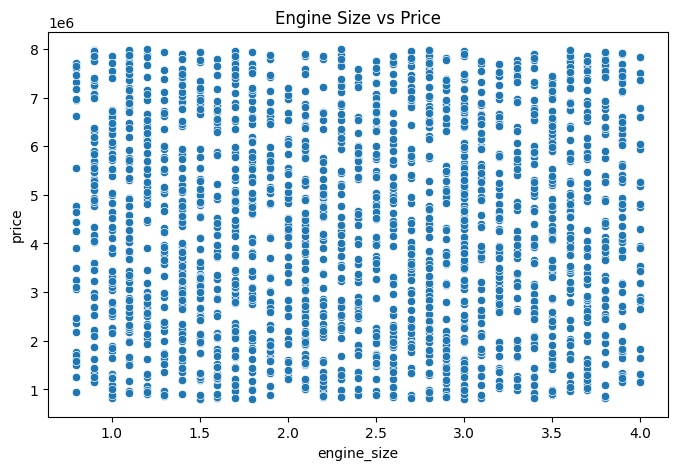

In [88]:
data = df.select("engine_size", "price").toPandas()

plt.figure(figsize=(8,5))
sns.scatterplot(x="engine_size", y="price", data=data)
plt.title("Engine Size vs Price")
plt.show()


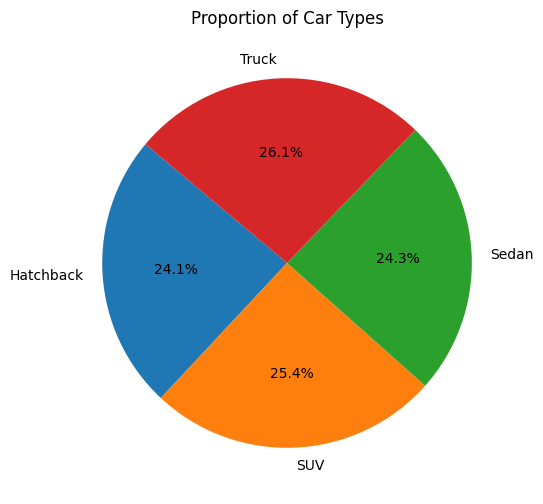

In [89]:
car_type_data = df.groupBy("car_type").count().toPandas()

plt.figure(figsize=(6,6))
plt.pie(car_type_data['count'], labels=car_type_data['car_type'], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Car Types")
plt.show()


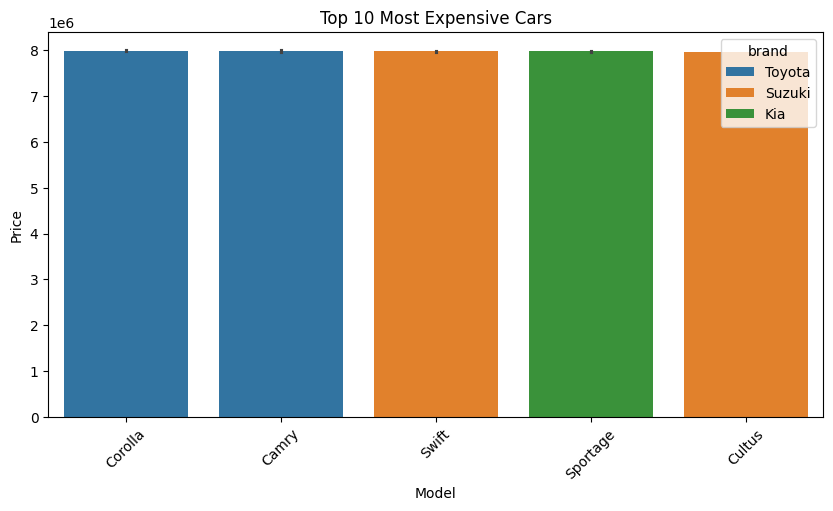

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = df.orderBy(col("price").desc()).limit(10).toPandas()

plt.figure(figsize=(10,5))
sns.barplot(x="model", y="price", hue="brand", data=top10)
plt.title("Top 10 Most Expensive Cars")
plt.ylabel("Price")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


C:\Users\abc\AppData\Local\Temp\ipykernel_16632\1756939255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg(price)", y="car_type", data=avg_price, palette="viridis")


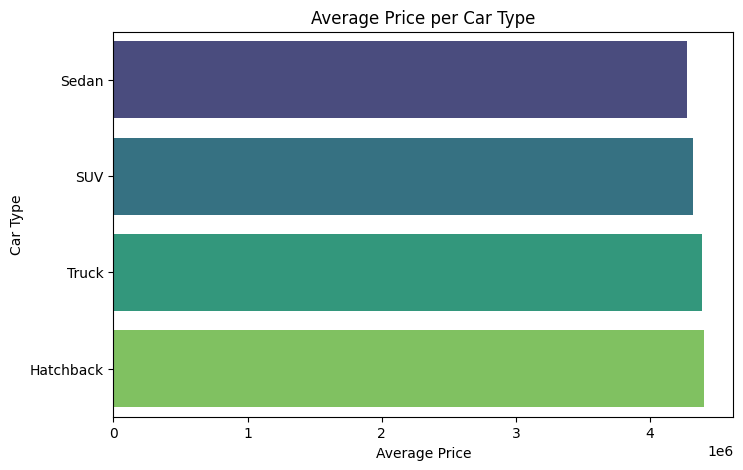

In [91]:
avg_price = df.groupBy("car_type").avg("price").toPandas()
avg_price = avg_price.sort_values("avg(price)", ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x="avg(price)", y="car_type", data=avg_price, palette="viridis")
plt.title("Average Price per Car Type")
plt.xlabel("Average Price")
plt.ylabel("Car Type")
plt.show()


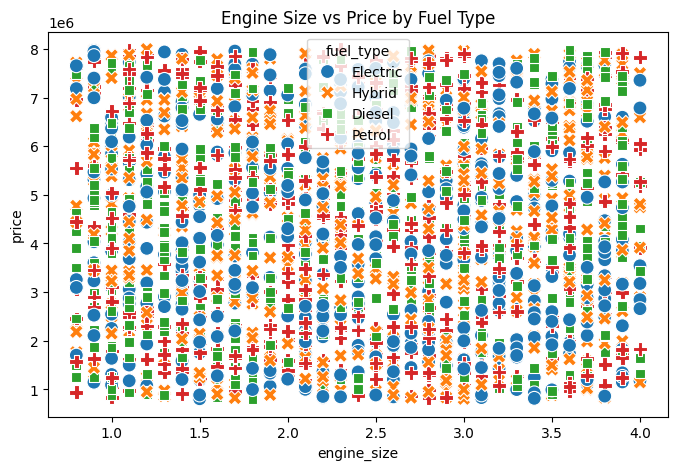

In [92]:
data = df.select("engine_size", "price", "fuel_type").toPandas()

plt.figure(figsize=(8,5))
sns.scatterplot(x="engine_size", y="price", hue="fuel_type", style="fuel_type", s=100, data=data)
plt.title("Engine Size vs Price by Fuel Type")
plt.show()


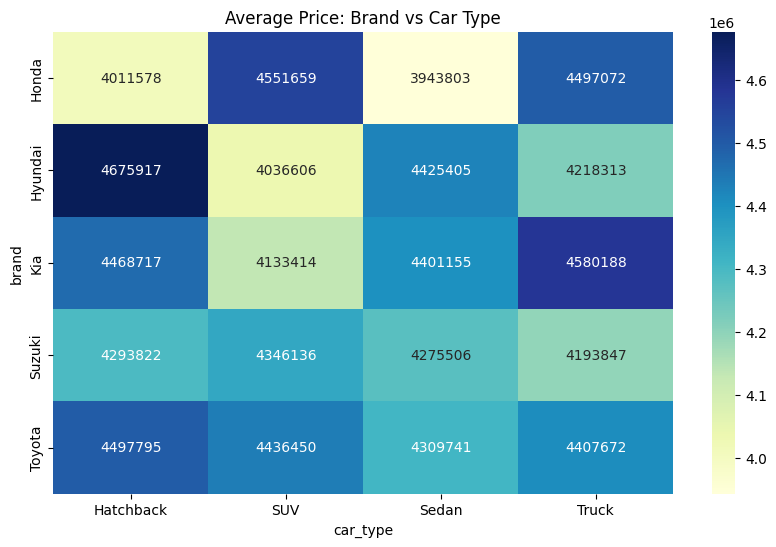

In [93]:
import pandas as pd

pivot = df.groupBy("brand", "car_type").avg("price").toPandas()
heatmap_data = pivot.pivot(index="brand", columns="car_type", values="avg(price)")

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price: Brand vs Car Type")
plt.show()


C:\Users\abc\AppData\Local\Temp\ipykernel_16632\1245801776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="transmission", y="price", data=data, palette="pastel")


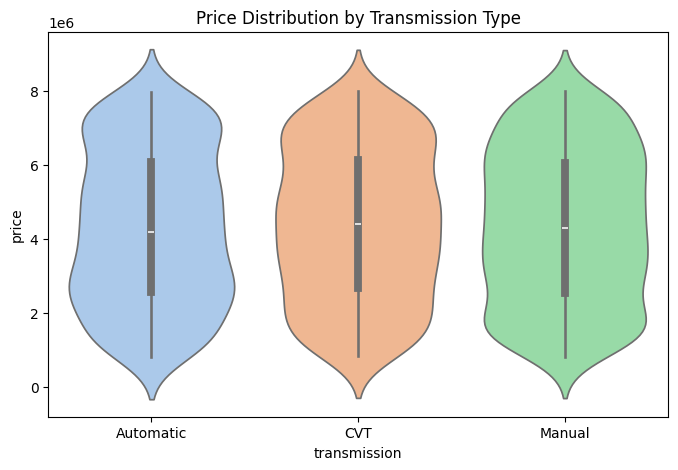

In [94]:
data = df.select("transmission", "price").toPandas()

plt.figure(figsize=(8,5))
sns.violinplot(x="transmission", y="price", data=data, palette="pastel")
plt.title("Price Distribution by Transmission Type")
plt.show()


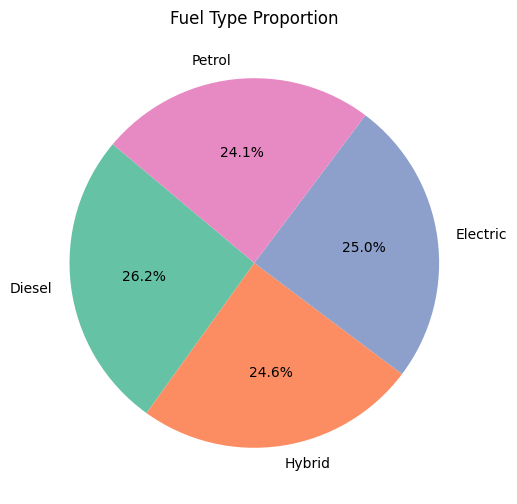

In [95]:
fuel_count = df.groupBy("fuel_type").count().toPandas()

plt.figure(figsize=(6,6))
plt.pie(fuel_count['count'], labels=fuel_count['fuel_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Fuel Type Proportion")
plt.show()


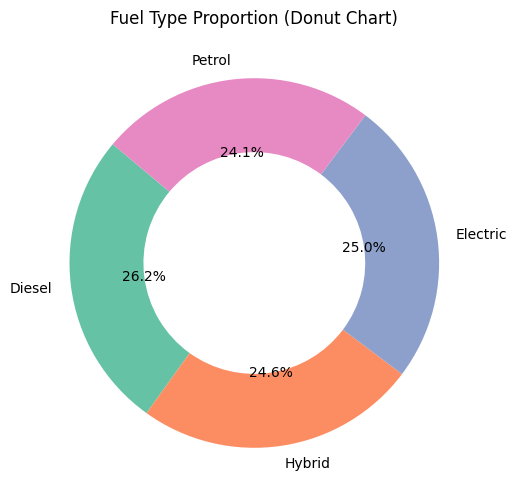

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get counts of fuel types
fuel_count = df.groupBy("fuel_type").count().toPandas()

# Donut pie chart
plt.figure(figsize=(6,6))
colors = sns.color_palette("Set2")

plt.pie(fuel_count['count'], labels=fuel_count['fuel_type'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.4))
plt.title("Fuel Type Proportion (Donut Chart)")
plt.show()


**Insight:** This mini-project covered loading, cleaning, EDA, feature engineering, modeling, and saving results. Use these steps as a template for a full project.